This documment summarized the analysis of the New York City Subway Dataset. It was also a part of final project submission for Project 2 of the "Introduction for Data Science", Udacity Data Analyst Nanodegree Program.

Table of content

## Analyzing the New York City Subway Dataset

### Load the data

In [2]:
import os
os.getcwd()

'/Users/thuy/Documents/Data-Science'

In [4]:
ls

Analyzing the NYC Subway Dataset.ipynb      hr_year.csv
P2_Wrangling_Subway_Data/                   lesson01.ipynb
Problem set 3.ipynb                         lesson3_Data_analysis.ipynb
Project4_all_functions.ipynb                lesson4_visualization.ipynb
README.md                                   loading_wrangling_data_lesson02.ipynb
baseball_stats.csv                          turnstile_data_master_with_weather (1).csv
hr_by_team_year_sf_la.csv


###Summary of the data

In [48]:
import pandas as pd
#Read the data as Dataframe
turnstile_weather = pd.read_csv("turnstile_data_master_with_weather (1).csv")

#Number of variables
print 'Total variables:', len(list(turnstile_weather.columns.values))

#list of variables
print 'List of variables: ', list(turnstile_weather.columns.values)

#Statistics summary of the data
print 'Statistics summary'
turnstile_weather.describe()

Total variables: 22
List of variables:  ['Unnamed: 0', 'UNIT', 'DATEn', 'TIMEn', 'Hour', 'DESCn', 'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti', 'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog', 'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi', 'thunder']
Statistics summary


,Unnamed: 0,Hour,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
count,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951
mean,65975.000000,10.896158,1095.348478,886.890838,30.031894,57.241302,48.259013,29.892714,52.703526,29.965077,0.167100,0.334245,5.543065,56.169775,64.269729,71.769968,0.172276,0
std,38091.117022,6.892084,2337.015421,2008.604886,0.125689,8.770891,11.305312,0.146384,9.943590,0.130461,0.373066,0.471728,1.982441,6.338875,6.568289,7.627218,0.429005,0
min,0.000000,0.000000,0.000000,0.000000,29.740000,39.000000,22.000000,29.540000,31.000000,29.640000,0.000000,0.000000,1.000000,46.000000,55.000000,58.000000,0.000000,0
25%,32987.500000,5.000000,39.000000,32.000000,29.960000,50.000000,38.000000,29.840000,45.000000,29.910000,0.000000,0.000000,5.000000,52.000000,60.000000,65.000000,0.000000,0
50%,65975.000000,12.000000,279.000000,232.000000,30.030000,57.000000,51.000000,29.910000,54.000000,29.960000,0.000000,0.000000,5.000000,54.000000,63.000000,71.000000,0.000000,0
75%,98962.500000,17.000000,1109.000000,847.000000,30.100000,64.000000,55.000000,29.970000,60.000000,30.050000,0.000000,1.000000,6.000000,60.000000,68.000000,78.000000,0.100000,0
max,131950.000000,23.000000,51839.000000,45249.000000,30.310000,70.000000,66.000000,30.230000,68.000000,30.270000,1.000000,1.000000,12.000000,70.000000,78.000000,86.000000,2.180000,0


###Section 0. References

1. http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

###Section 1. Statistical Test

####1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

Weather has a significant impact on what kinds of transportation you want to go. Rain was one of the most important weather factor. Therefore, I wanted to know the difference in ridership of the NYC subway on the days with rain and without rain. 



In [52]:
#Summary of ridership on rainy days
turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].describe()

count    44104.000000
mean      1105.446377
std       2370.527674
min          0.000000
25%         41.000000
50%        282.000000
75%       1103.250000
max      51839.000000
Name: ENTRIESn_hourly, dtype: float64

In [54]:
#Summary of ridership on no rainy days
turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].describe()

count    87847.000000
mean      1090.278780
std       2320.004938
min          0.000000
25%         38.000000
50%        278.000000
75%       1111.000000
max      43199.000000
Name: ENTRIESn_hourly, dtype: float64

From the above statistic, we could see that both data had similar mean and standard deviation.

Before I perform a statistical test, it is useful to take a look at the data and determine what distribution the data follows. 

#####1.1.1 Distribution of NYC subway ridership on the days with rain and without rain

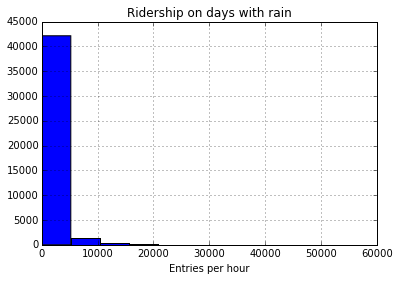

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

# Rain
turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].hist()
plt.title('Ridership on days with rain')
plt.xlabel('Entries per hour')

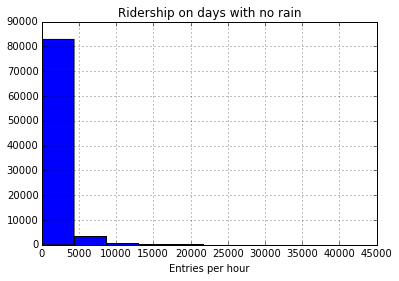

In [27]:
# No rain
turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].hist()
plt.title('Ridership on days with no rain')
plt.xlabel('Entries per hour')

The results showed that both datahad similar mean and standard deviation and were not normally distributed. Therefore, T-test was not an option. Since we had two groups of data and the data has similar shapes, we could use Mann Whitney U-test to compare their distributions. We used two-tail test since we did not have any data supporting which group had larger mean.

My hypothesis:

Ho: The distribution of the number of entries is the same for rainny and non-rainy days. 
H1: The distribution of the number of entries is statistically different for rainny and non-rainy days.




#####1.1.2 Mann Whitney U-test

In [55]:
import numpy as np
import scipy
import scipy.stats
import pandas

# Consume turnstile_weather dataframe
# Return mean of entries with rain, mean of enteries without rain
# Return Mann_Whitney U-statistic and p value 

def mann_whitney_plus_means(turnstile_weather):
    with_rain_mean = turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].mean()
    without_rain_mean = turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].mean()
    U,p = scipy.stats.mannwhitneyu(turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'], turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'])
    print 'P value =', p*2 # the mannwhitenyu returned one-tail p value
    return with_rain_mean, without_rain_mean, U, p

In [56]:
mann_whitney_plus_means(turnstile_weather)

P value = 0.049999825587


(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.024999912793489721)

P value is less than/almost equal to 0.05. Therefore, we could reject the null hypothesis and conclude that the distribution of the number of entries is statistically different for rainny and non-rainy days.
